In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator




# Load data

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Data shape

In [ ]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Classes:", np.unique(y_train))

# Show some images

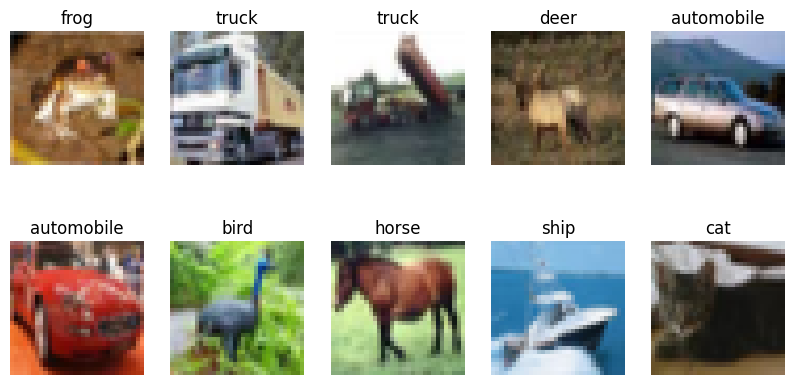

In [3]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

#**Data Augmentation**

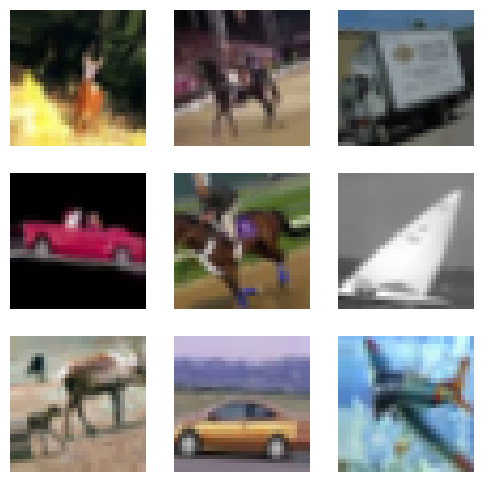

In [6]:


# Create an image data generator with augmentations
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)

# Preview augmented images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    plt.figure(figsize=(6,6))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    break


# Build CNN

# Build CNN

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"CNN Test Accuracy: {test_acc}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 46ms/step - accuracy: 0.2870 - loss: 3.0286 - val_accuracy: 0.4672 - val_loss: 1.5151
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.4987 - loss: 1.3966 - val_accuracy: 0.5491 - val_loss: 1.2953
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5820 - loss: 1.1884 - val_accuracy: 0.5723 - val_loss: 1.2295
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6222 - loss: 1.0805 - val_accuracy: 0.6067 - val_loss: 1.1414
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6579 - loss: 0.9818 - val_accuracy: 0.6146 - val_loss: 1.1301
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 51ms/step - accuracy: 0.6917 - loss: 0.9028 - val_accuracy: 0.6158 - val_loss: 1.1575
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.7063 - loss: 0.8460 - val_accuracy: 0.6540 - val_loss: 1.0360
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7273 -

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

#Model Training with EarlyStopping & Checkpoints

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_cnn_model.h5", save_best_only=True)
]

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.1738 - loss: 2.2080

782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.1739 - loss: 2.2077 - val_accuracy: 0.2035 - val_loss: 34.9014
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.3604 - loss: 1.7342 - val_accuracy: 0.2308 - val_loss: 99.9302
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 126ms/step - accuracy: 0.4350 - loss: 1.5463 - val_accuracy: 0.2058 - val_loss: 169.1538
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 124ms/step - accuracy: 0.4731 - loss: 1.4475 - val_accuracy: 0.2152 - val_loss: 191.6342


# Model Evaluation

In [10]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2006 - loss: 35.3386

Test Accuracy: 20.35%


# Plot Accuracy and Loss Curves

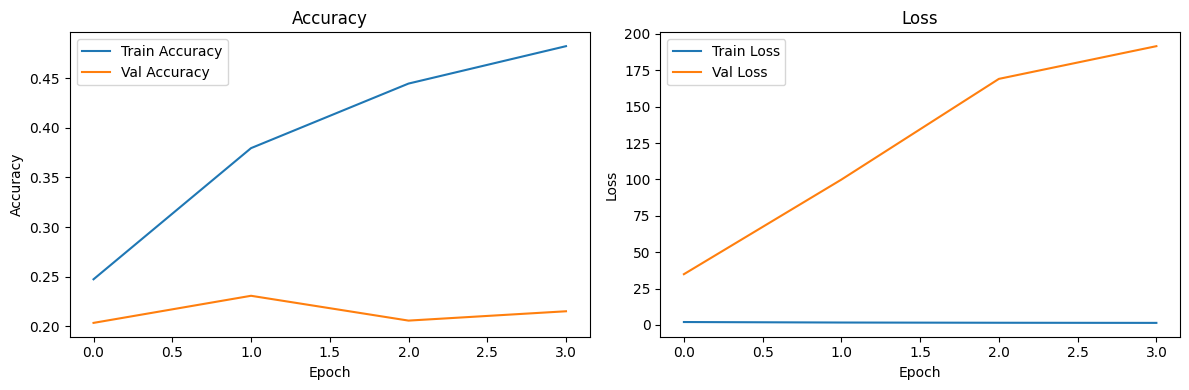

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Save the Final Model

In [ ]:
model.save("final_cnn_cifar10_model.h5")